In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/ML Dataset/Decision Tree & Naive Bayes Classification/madfhantr.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
mean_value=df['Credit_History'].mean()
df['Credit_History'].fillna(value=mean_value, inplace=True)

In [ ]:
mean_value=df['LoanAmount'].mean()
df['LoanAmount'].fillna(value=mean_value, inplace=True)

In [ ]:
mean_value = df["Loan_Amount_Term"].mean()
df["Loan_Amount_Term"].fillna(value = mean_value,inplace=True)

In [ ]:
# d={'Male':1, 'Female':2}
# df['Gender']=df['Gender'].map(d)

# e={'Yes':1, 'No':0}
# df['Married']=df['Married'].map(e)

# e={'Graduate':1, 'Not Graduate':0}
# df['Education']=df['Education'].map(e)

# e={'Yes':1, 'No':0}
# df['Self_Employed']=df['Self_Employed'].map(e)

# e={'Yes':1, 'No':0}
# df['Loan_Status']=df['Loan_Status'].map(e)

from sklearn.preprocessing import LabelEncoder
var_mod = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i].astype(str))
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1


In [ ]:
from sklearn.model_selection import train_test_split

X = df[["Credit_History","ApplicantIncome","Married","Gender"]]
Y = df[["Loan_Status"]]
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(X_train, y_train)


DecisionTreeClassifier()

[Text(0.277220718503937, 0.98, 'X[0] <= 0.421\ngini = 0.43\nsamples = 614\nvalue = [192, 422]'),
 Text(0.13188976377952755, 0.94, 'X[1] <= 28124.5\ngini = 0.145\nsamples = 89\nvalue = [82, 7]'),
 Text(0.11023622047244094, 0.9, 'X[1] <= 4316.5\ngini = 0.128\nsamples = 87\nvalue = [81, 6]'),
 Text(0.09055118110236221, 0.86, 'X[1] <= 2541.5\ngini = 0.07\nsamples = 55\nvalue = [53, 2]'),
 Text(0.08267716535433071, 0.82, 'X[1] <= 2468.5\ngini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.07480314960629922, 0.78, 'X[3] <= 0.5\ngini = 0.124\nsamples = 15\nvalue = [14, 1]'),
 Text(0.06692913385826772, 0.74, 'X[1] <= 2137.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]'),
 Text(0.05905511811023622, 0.7, 'X[1] <= 1983.5\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.051181102362204724, 0.66, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.06692913385826772, 0.66, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.07480314960629922, 0.7, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 T

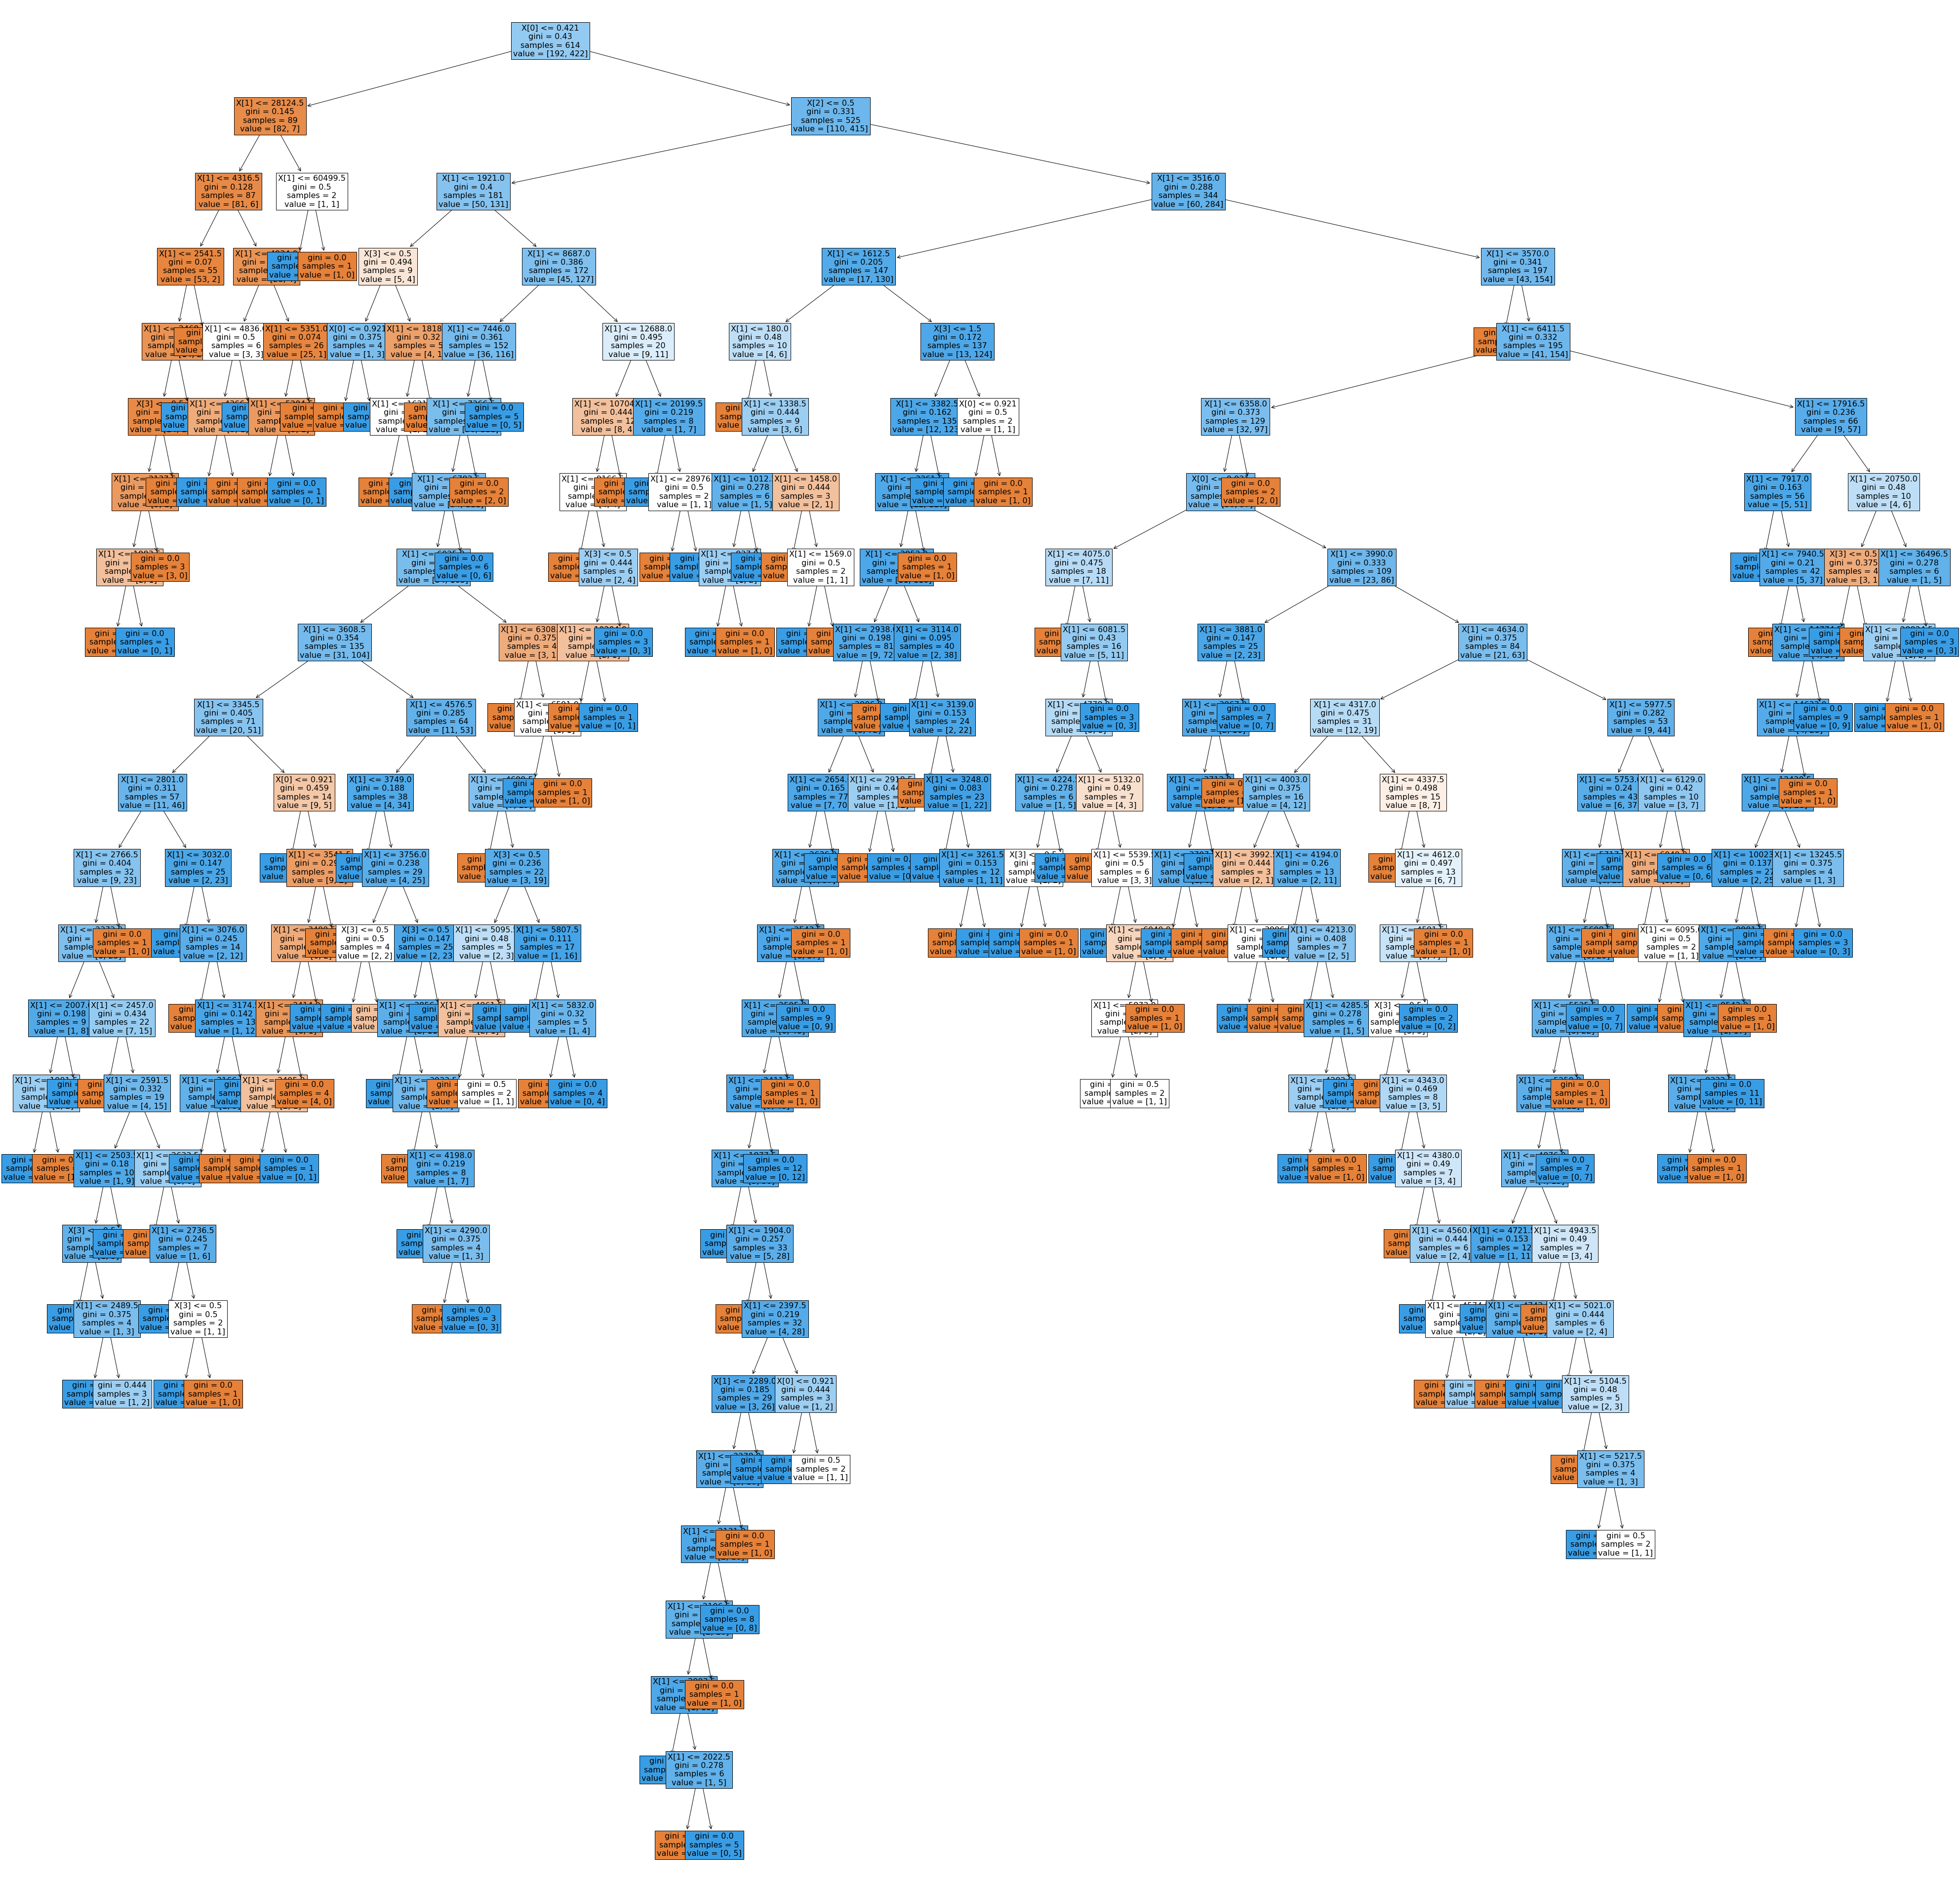

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

clf=tree.DecisionTreeClassifier()
model=clf.fit(X,Y)

plt.figure(figsize=(70,70))
# classes=['Not Granted Loan','Granted Loan']
tree.plot_tree(clf, filled=True, fontsize=16)